# 📊 Exploratory Data Analysis (EDA)

In this notebook, we perform a comprehensive exploratory data analysis (EDA) on the restaurant dataset to understand its structure, quality, and key insights. 

We'll also carry out **initial data preprocessing steps** such as handling missing values, correcting data types, and basic cleaning to ensure meaningful visualizations and analysis.

> 🔧 Note: While some preprocessing will be done here for exploration purposes, final and consistent preprocessing steps will be implemented separately in a dedicated preprocessing script or notebook.

## Import Required Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Load Raw Dataset

In [2]:
data = pd.read_csv("../data/raw/Dataset.csv")
data.shape

(9551, 21)

In [3]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
data.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,��stanbul,"Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...",Moda,"Moda, ��stanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


## Dataset Exploration

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
data.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
data.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Restaurant ID,9551.0,NaN,NaN,NaN,9051128.349178,8791521.282104,53.0,301962.5,6004089.0,18352291.5,18500652.0
Restaurant Name,9551,7446,Cafe Coffee Day,83,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country Code,9551.0,NaN,NaN,NaN,18.365616,56.750546,1.0,1.0,1.0,1.0,216.0
City,9551,141,New Delhi,5473,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Address,9551,8918,"Dilli Haat, INA, New Delhi",11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Locality,9551,1208,Connaught Place,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Locality Verbose,9551,1265,"Connaught Place, New Delhi",122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Longitude,9551.0,NaN,NaN,NaN,64.126574,41.467058,-157.948486,77.081343,77.191964,77.282006,174.832089
Latitude,9551.0,NaN,NaN,NaN,25.854381,11.007935,-41.330428,28.478713,28.570469,28.642758,55.97698
Cuisines,9542,1825,North Indian,936,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
print(data['Has Table booking'].unique())
print(data['Has Online delivery'].unique())
print(data['Is delivering now'].unique())
print(data['Rating color'].unique())
print(data['Rating text'].unique())
print(data['Price range'].unique())
print(data['Currency'].unique())
print(data['Country Code'].unique())

['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['Dark Green' 'Green' 'Yellow' 'Orange' 'White' 'Red']
['Excellent' 'Very Good' 'Good' 'Average' 'Not rated' 'Poor']
[3 4 2 1]
['Botswana Pula(P)' 'Brazilian Real(R$)' 'Dollar($)' 'Emirati Diram(AED)'
 'Indian Rupees(Rs.)' 'Indonesian Rupiah(IDR)' 'NewZealand($)'
 'Pounds(��)' 'Qatari Rial(QR)' 'Rand(R)' 'Sri Lankan Rupee(LKR)'
 'Turkish Lira(TL)']
[162  30 216  14  37 184 214   1  94 148 215 166 189 191 208]


In [11]:
# Group by the Rating text and get the range of Aggregate ratings for each category
rating_ranges = data.groupby('Rating text')['Aggregate rating'].agg(['min', 'max', 'mean'])
print(rating_ranges)

             min  max      mean
Rating text                    
Average      2.5  3.4  3.051619
Excellent    4.5  4.9  4.659801
Good         3.5  3.9  3.683429
Not rated    0.0  0.0  0.000000
Poor         1.8  2.4  2.297849
Very Good    4.0  4.4  4.168119


### Obserations
* This dataset contains `9551` rows and `21` columns.
* `Cuisines` has 9 null values, which we can simply remove.
* `Restaurant ID` is a unique identifier, so we can drop it.
* `Switch to order menu` is a constant feature, so we can drop it as well.
* `Has Table booking`, `Has Online delivery` & `Is delivering now` are binary features (Yes/No), so we can convert them to 0/1 using **binary encoding**.
* `Rating text` and `Rating color` carry the same information as `Aggregate rating` but with different representations. Keeping them in the model can introduce **data leakage** and may also result in **multicollinearity**, so it is best to drop these features.
* Although `Country code` is represented as a numerical feature, it is categorical in nature and should be encoded accordingly.

## Data Visualization

### Country Code Count Plot

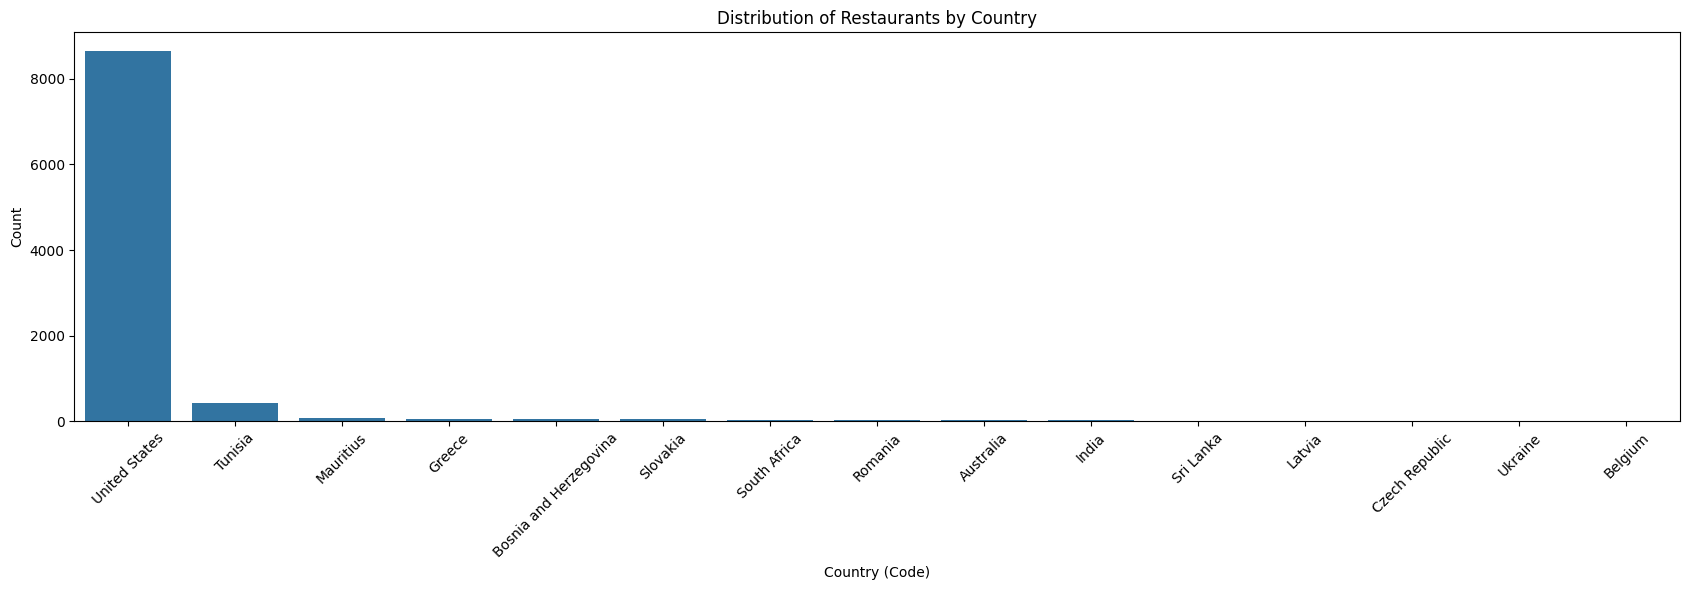

In [12]:
country_code_mapping = {
    162: 'India',
    30: 'Greece',
    216: 'Tunisia',
    14: 'Australia',
    37: 'Belgium',
    184: 'Latvia',
    214: 'Bosnia and Herzegovina',
    1: 'United States',
    94: 'Sri Lanka',
    148: 'South Africa',
    215: 'Mauritius',
    166: 'Czech Republic',
    189: 'Slovakia',
    191: 'Ukraine',
    208: 'Romania'
}

data['Country Name'] = data['Country Code'].map(country_code_mapping)

# Plotting
plt.figure(figsize=(17, 6))
sns.countplot(data=data, x='Country Name', order=data['Country Name'].value_counts().index)
plt.title('Distribution of Restaurants by Country')

# Rotate labels for better readability
plt.xticks(rotation=45)
plt.xlabel('Country (Code)')
plt.ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()


### Average Aggregate Rating by Rating Category (Color-Coded)

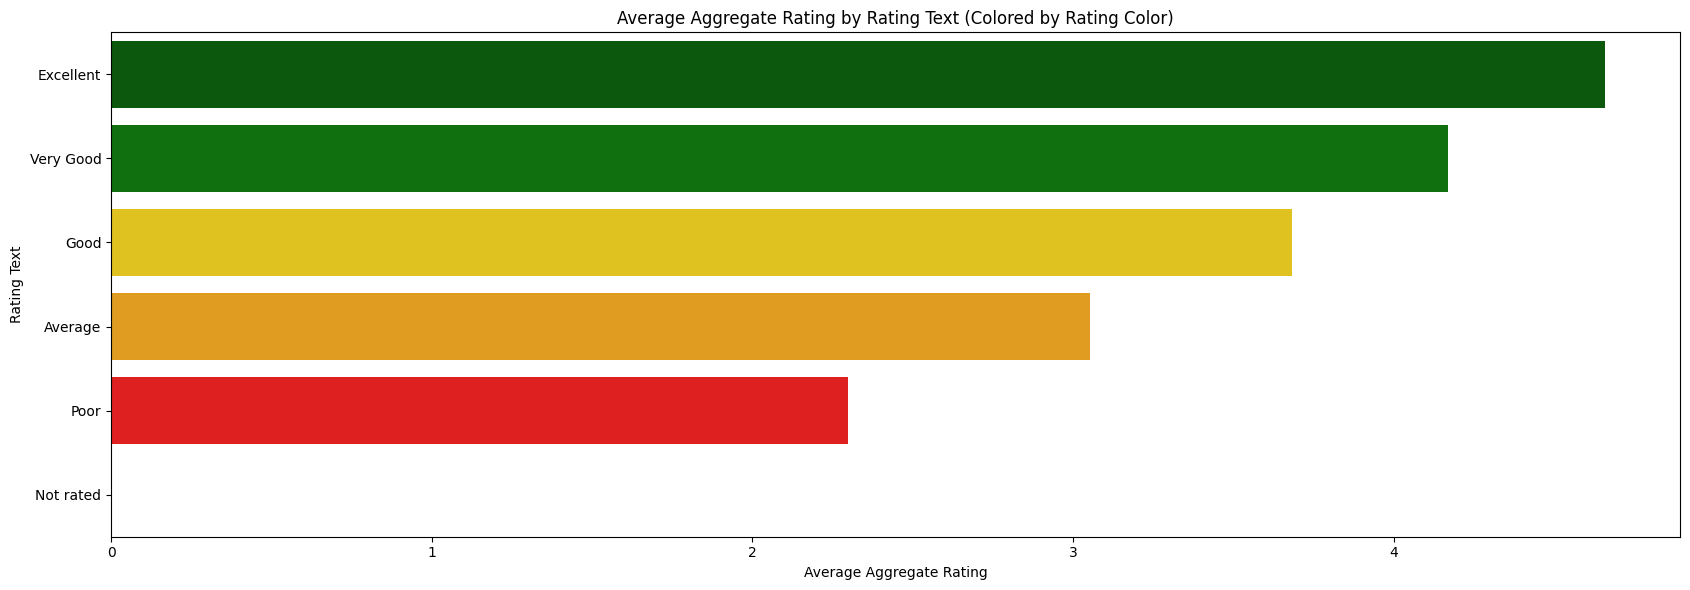

In [13]:
# Define a manual mapping from rating color name to valid matplotlib colors
color_mapping = {
    'White': '#ffffff',
    'Dark Green': '#006400',
    'Green': '#008000',
    'Yellow': '#FFD700',
    'Orange': '#FFA500',
    'Red': '#FF0000'
}

# Prepare the data
rating_summary = data.groupby(['Rating text', 'Rating color'])['Aggregate rating'].mean().reset_index()
rating_summary = rating_summary.sort_values('Aggregate rating', ascending=False)

# Create a palette dictionary using Rating text as key and actual color codes
palette_dict = {
    row['Rating text']: color_mapping[row['Rating color']]
    for _, row in rating_summary.iterrows()
}

# Plot
plt.figure(figsize=(17, 6))
sns.barplot(
    data=rating_summary,
    x='Aggregate rating',
    y='Rating text',
    hue='Rating text',
    palette=palette_dict,
    dodge=False,
    legend=False
)
plt.title('Average Aggregate Rating by Rating Text (Colored by Rating Color)')
plt.xlabel('Average Aggregate Rating')
plt.ylabel('Rating Text')
plt.tight_layout()
plt.show()

### Aggregate Ratings Distribution

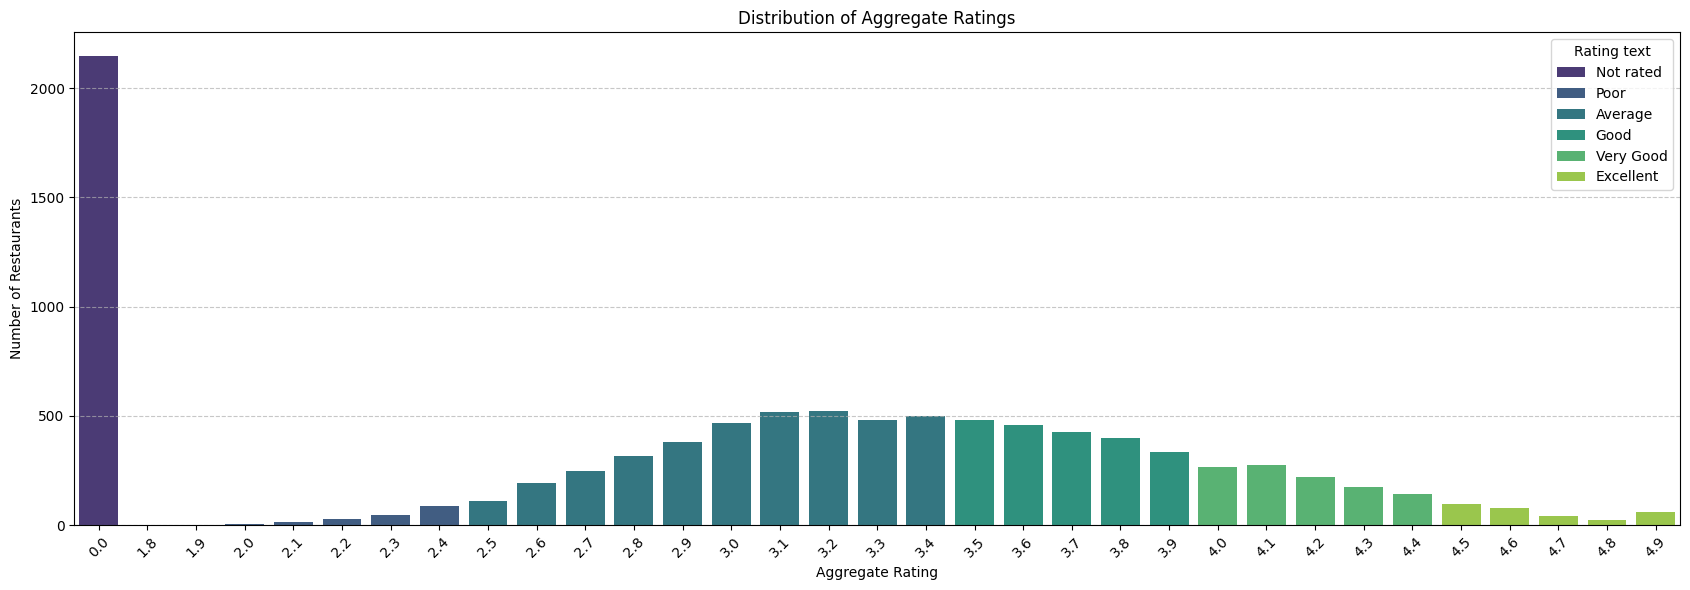

In [14]:
plt.figure(figsize=(17, 6))
sns.countplot(data=data, x='Aggregate rating', palette='viridis', hue='Rating text')

plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)  # Rotate x-labels if ratings are not evenly spaced
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Pricing Distribution & Currency Analysis

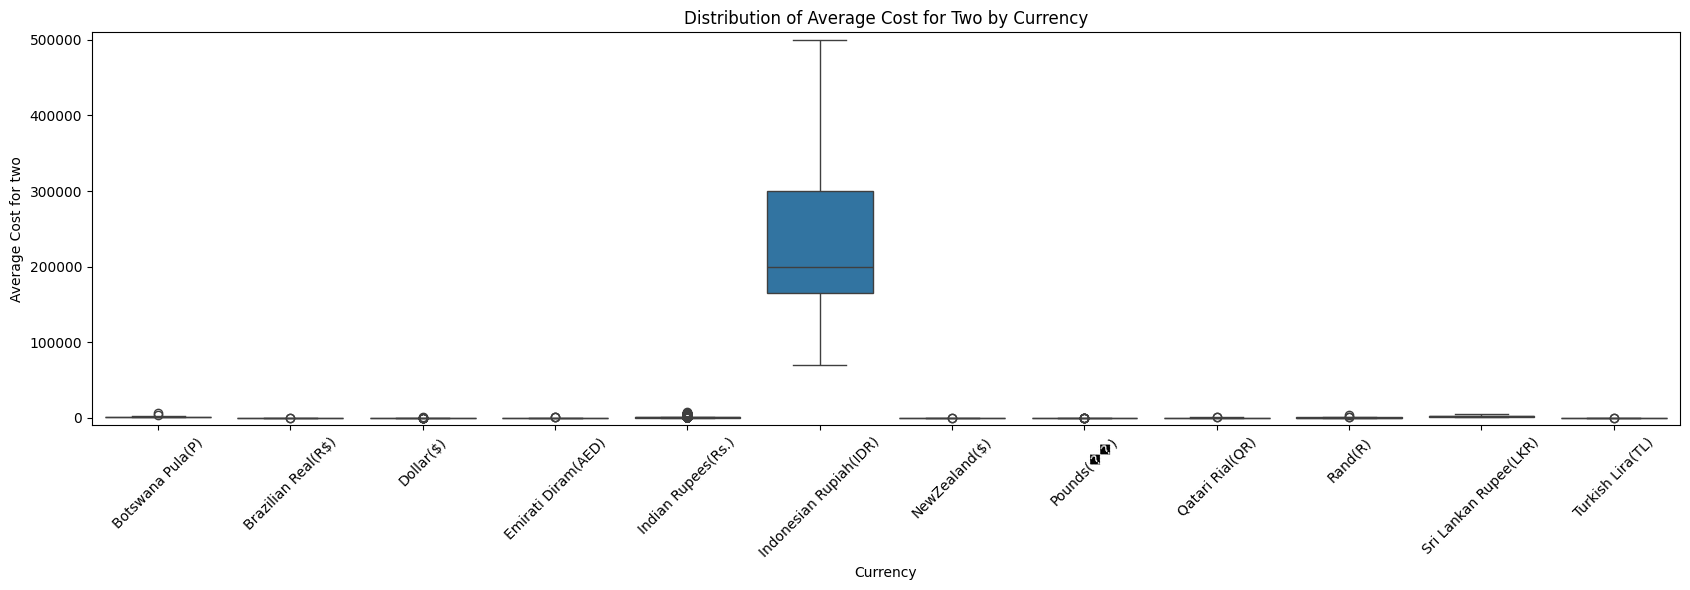

In [15]:
plt.figure(figsize=(17, 6))
sns.boxplot(data=data, x='Currency', y='Average Cost for two')
plt.xticks(rotation=45)
plt.ylim((-10000, 510000))
plt.title('Distribution of Average Cost for Two by Currency')
plt.tight_layout()
plt.show()

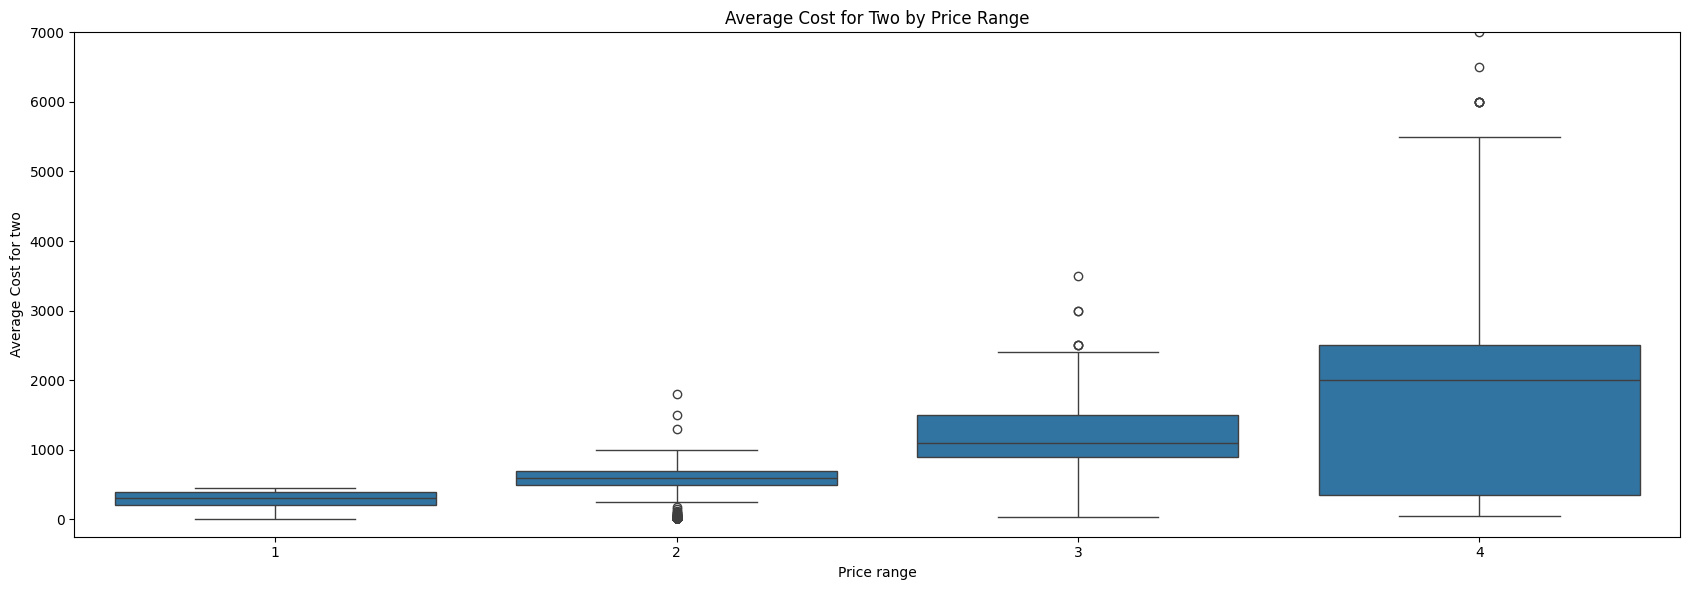

In [16]:
plt.figure(figsize=(17, 6))
sns.boxplot(data=data, x='Price range', y='Average Cost for two')
plt.title('Average Cost for Two by Price Range')
plt.ylim((-250, 7000))
plt.tight_layout()
plt.show()

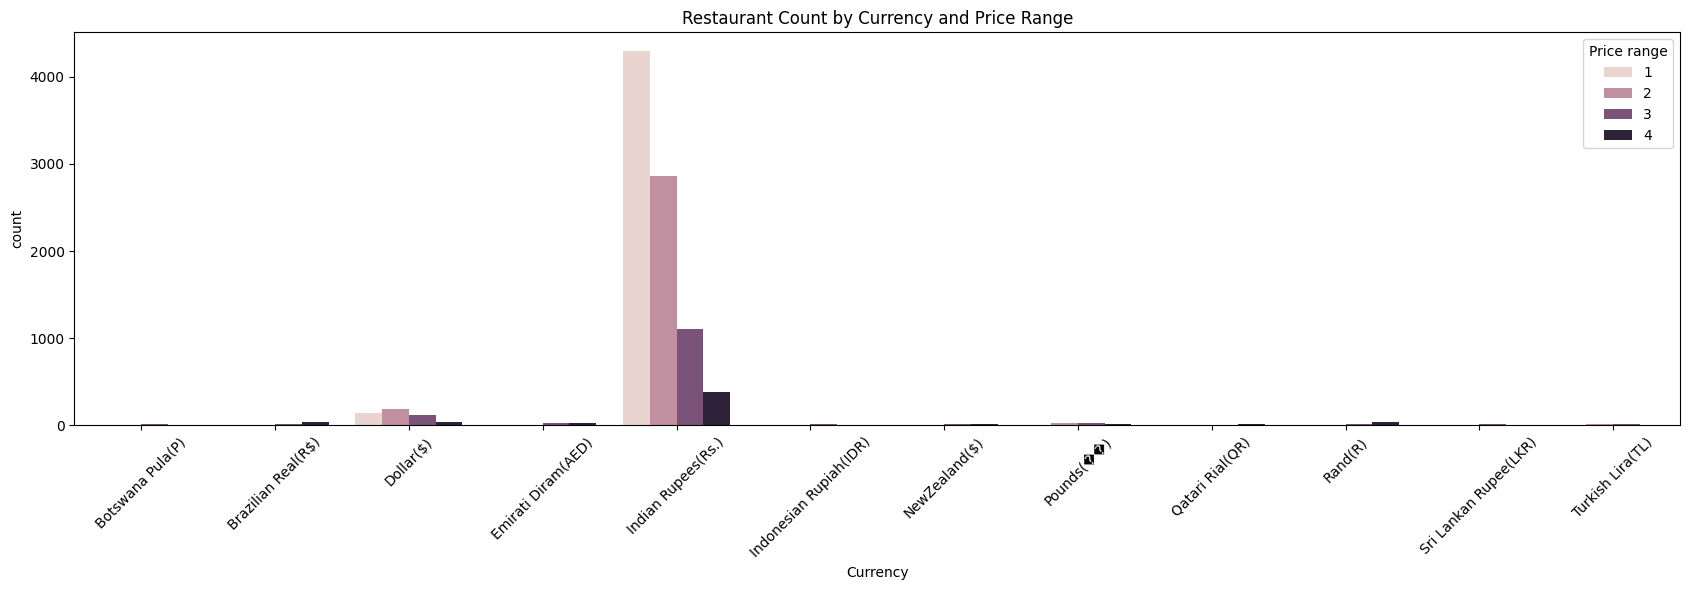

In [17]:
plt.figure(figsize=(17, 6))
sns.countplot(data=data, x='Currency', hue='Price range')
plt.xticks(rotation=45)
plt.title('Restaurant Count by Currency and Price Range')
plt.tight_layout()
plt.show()

### Votes Distribution

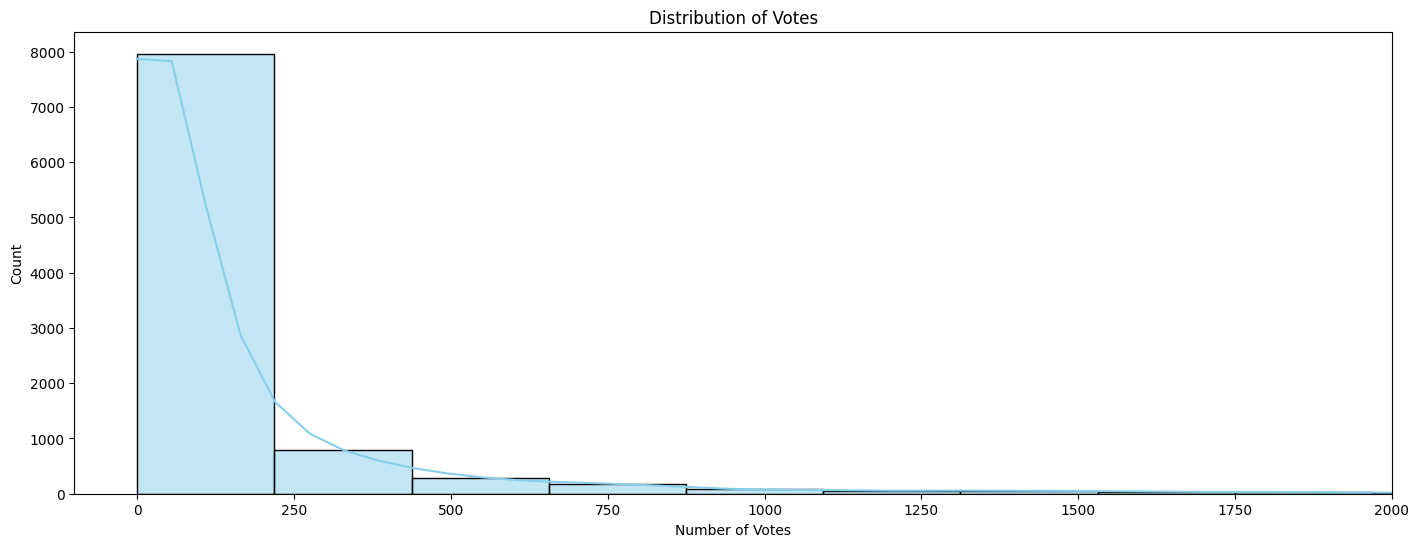

In [18]:
plt.figure(figsize=(17, 6))
sns.histplot(data=data, x='Votes', bins=50, kde=True, color='skyblue')
plt.title('Distribution of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Count')
plt.xlim((-100, 2000))
plt.show()

### Currencies Distribution

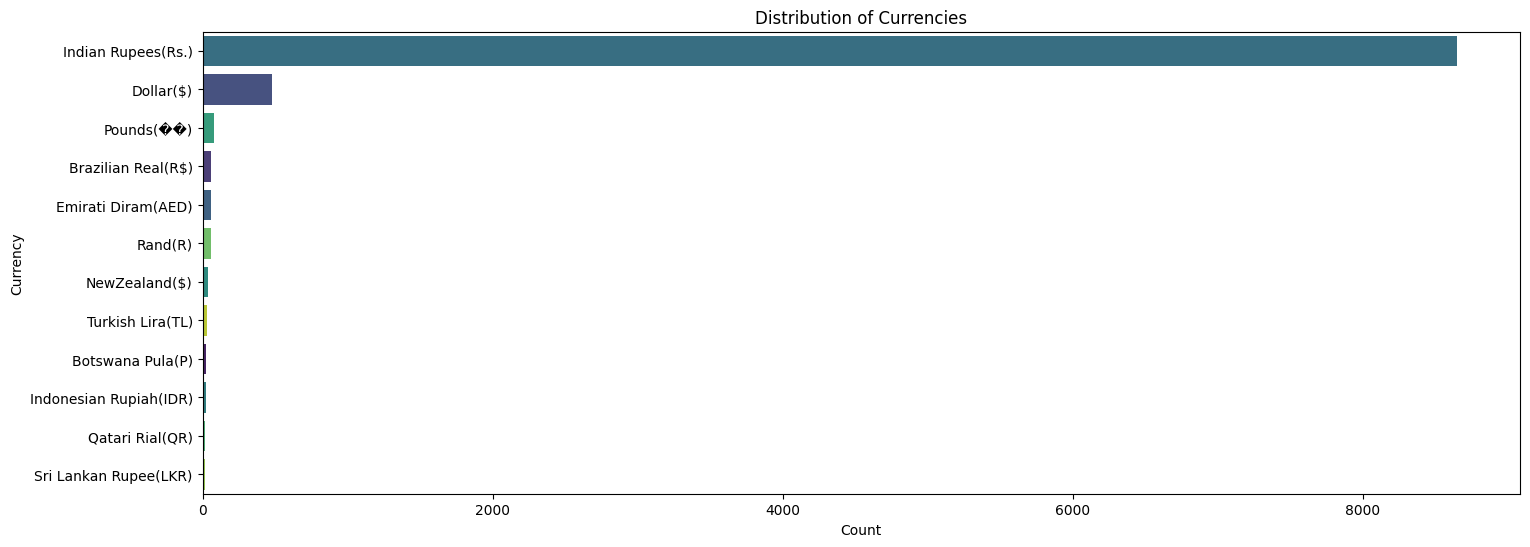

In [19]:
plt.figure(figsize=(17, 6))
sns.countplot(data=data, y='Currency', order=data['Currency'].value_counts().index, palette='viridis', hue='Currency')
plt.title('Distribution of Currencies')
plt.xlabel('Count')
plt.ylabel('Currency')
plt.show()

## Most Frequent Restaurants

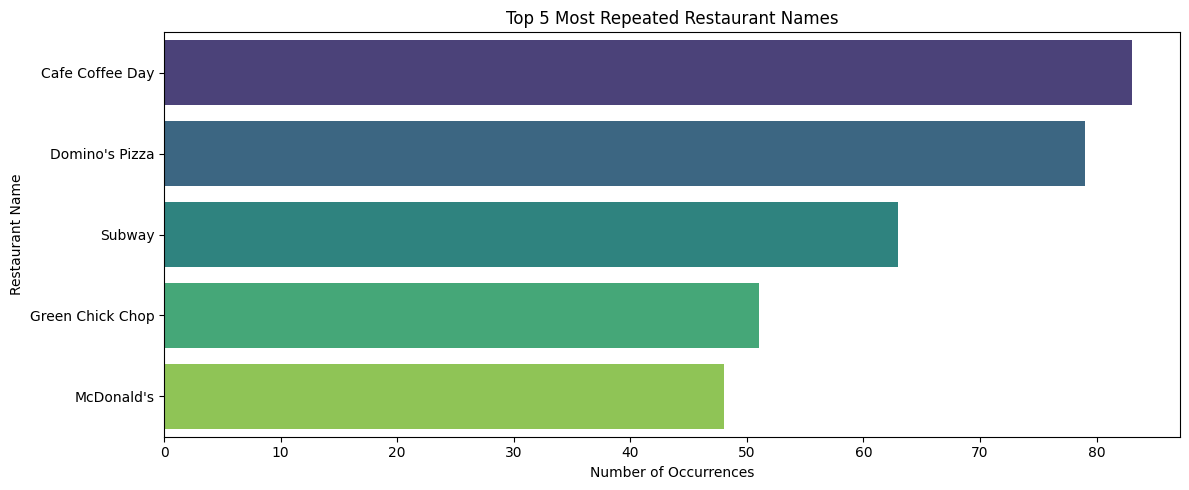

In [20]:
# Get top 3 most frequent restaurant names
top_restaurants = data['Restaurant Name'].value_counts().head(5)

# Plot
plt.figure(figsize=(12, 5))
sns.barplot(x=top_restaurants.values, y=top_restaurants.index, palette='viridis', hue=top_restaurants.index)
plt.title('Top 5 Most Repeated Restaurant Names')
plt.xlabel('Number of Occurrences')
plt.ylabel('Restaurant Name')
plt.tight_layout()
plt.show()

### Observations
* An interesting inconsistency appears in the dataset: although the most common **country** is the `United States`, the most frequently used **currency** is `Indian Rupees (Rs.)`, which is unusual and suggests a possible issue with data labeling or source formatting.
* The `Indian Rupees (Rs.)` currency exhibits a significantly wider range of values in the `Average Cost for two` column compared to other currencies.
* A large portion of the restaurants in the dataset are unrated, which may impact the analysis of rating-related insights.
* The most dominant restaurant chains in the dataset are **Cafe Coffee Day**, **Domino's Pizza**, **Subway**, **Green Chick Chop**, and **McDonald's**, with **Cafe Coffee Day** being the most frequently occurring.

## Data Preprocessing

In [21]:
data = data.dropna()
data.shape

(9542, 22)

In [22]:
data = data.drop(columns=['Rating color', 'Rating text', 'Restaurant ID', 'Country Code', 'Switch to order menu'])
data.shape

(9542, 17)

In [23]:
data['Has Table booking'] = data['Has Table booking'].map({'Yes': 1, 'No': 0})
data['Has Online delivery'] = data['Has Online delivery'].map({'Yes': 1, 'No': 0})
data['Is delivering now'] = data['Is delivering now'].map({'Yes': 1, 'No': 0})

In [24]:
encoder = LabelEncoder()
data['Country Name'] = encoder.fit_transform(data['Country Name'])
data['Currency'] = encoder.fit_transform(data['Currency'])
data['City'] = encoder.fit_transform(data['City'])
data.head()

,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Votes,Country Name
0,Le Petit Souffle,73,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,0,1,0,0,3,4.8,314,5
1,Izakaya Kikufuji,73,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,0,1,0,0,3,4.5,591,5
2,Heat - Edsa Shangri-La,75,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,0,1,0,0,4,4.4,270,5
3,Ooma,75,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,0,0,0,0,4,4.9,365,5
4,Sambo Kojin,75,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,0,1,0,0,4,4.8,229,5


## Bivariate & Multivariate Analysis

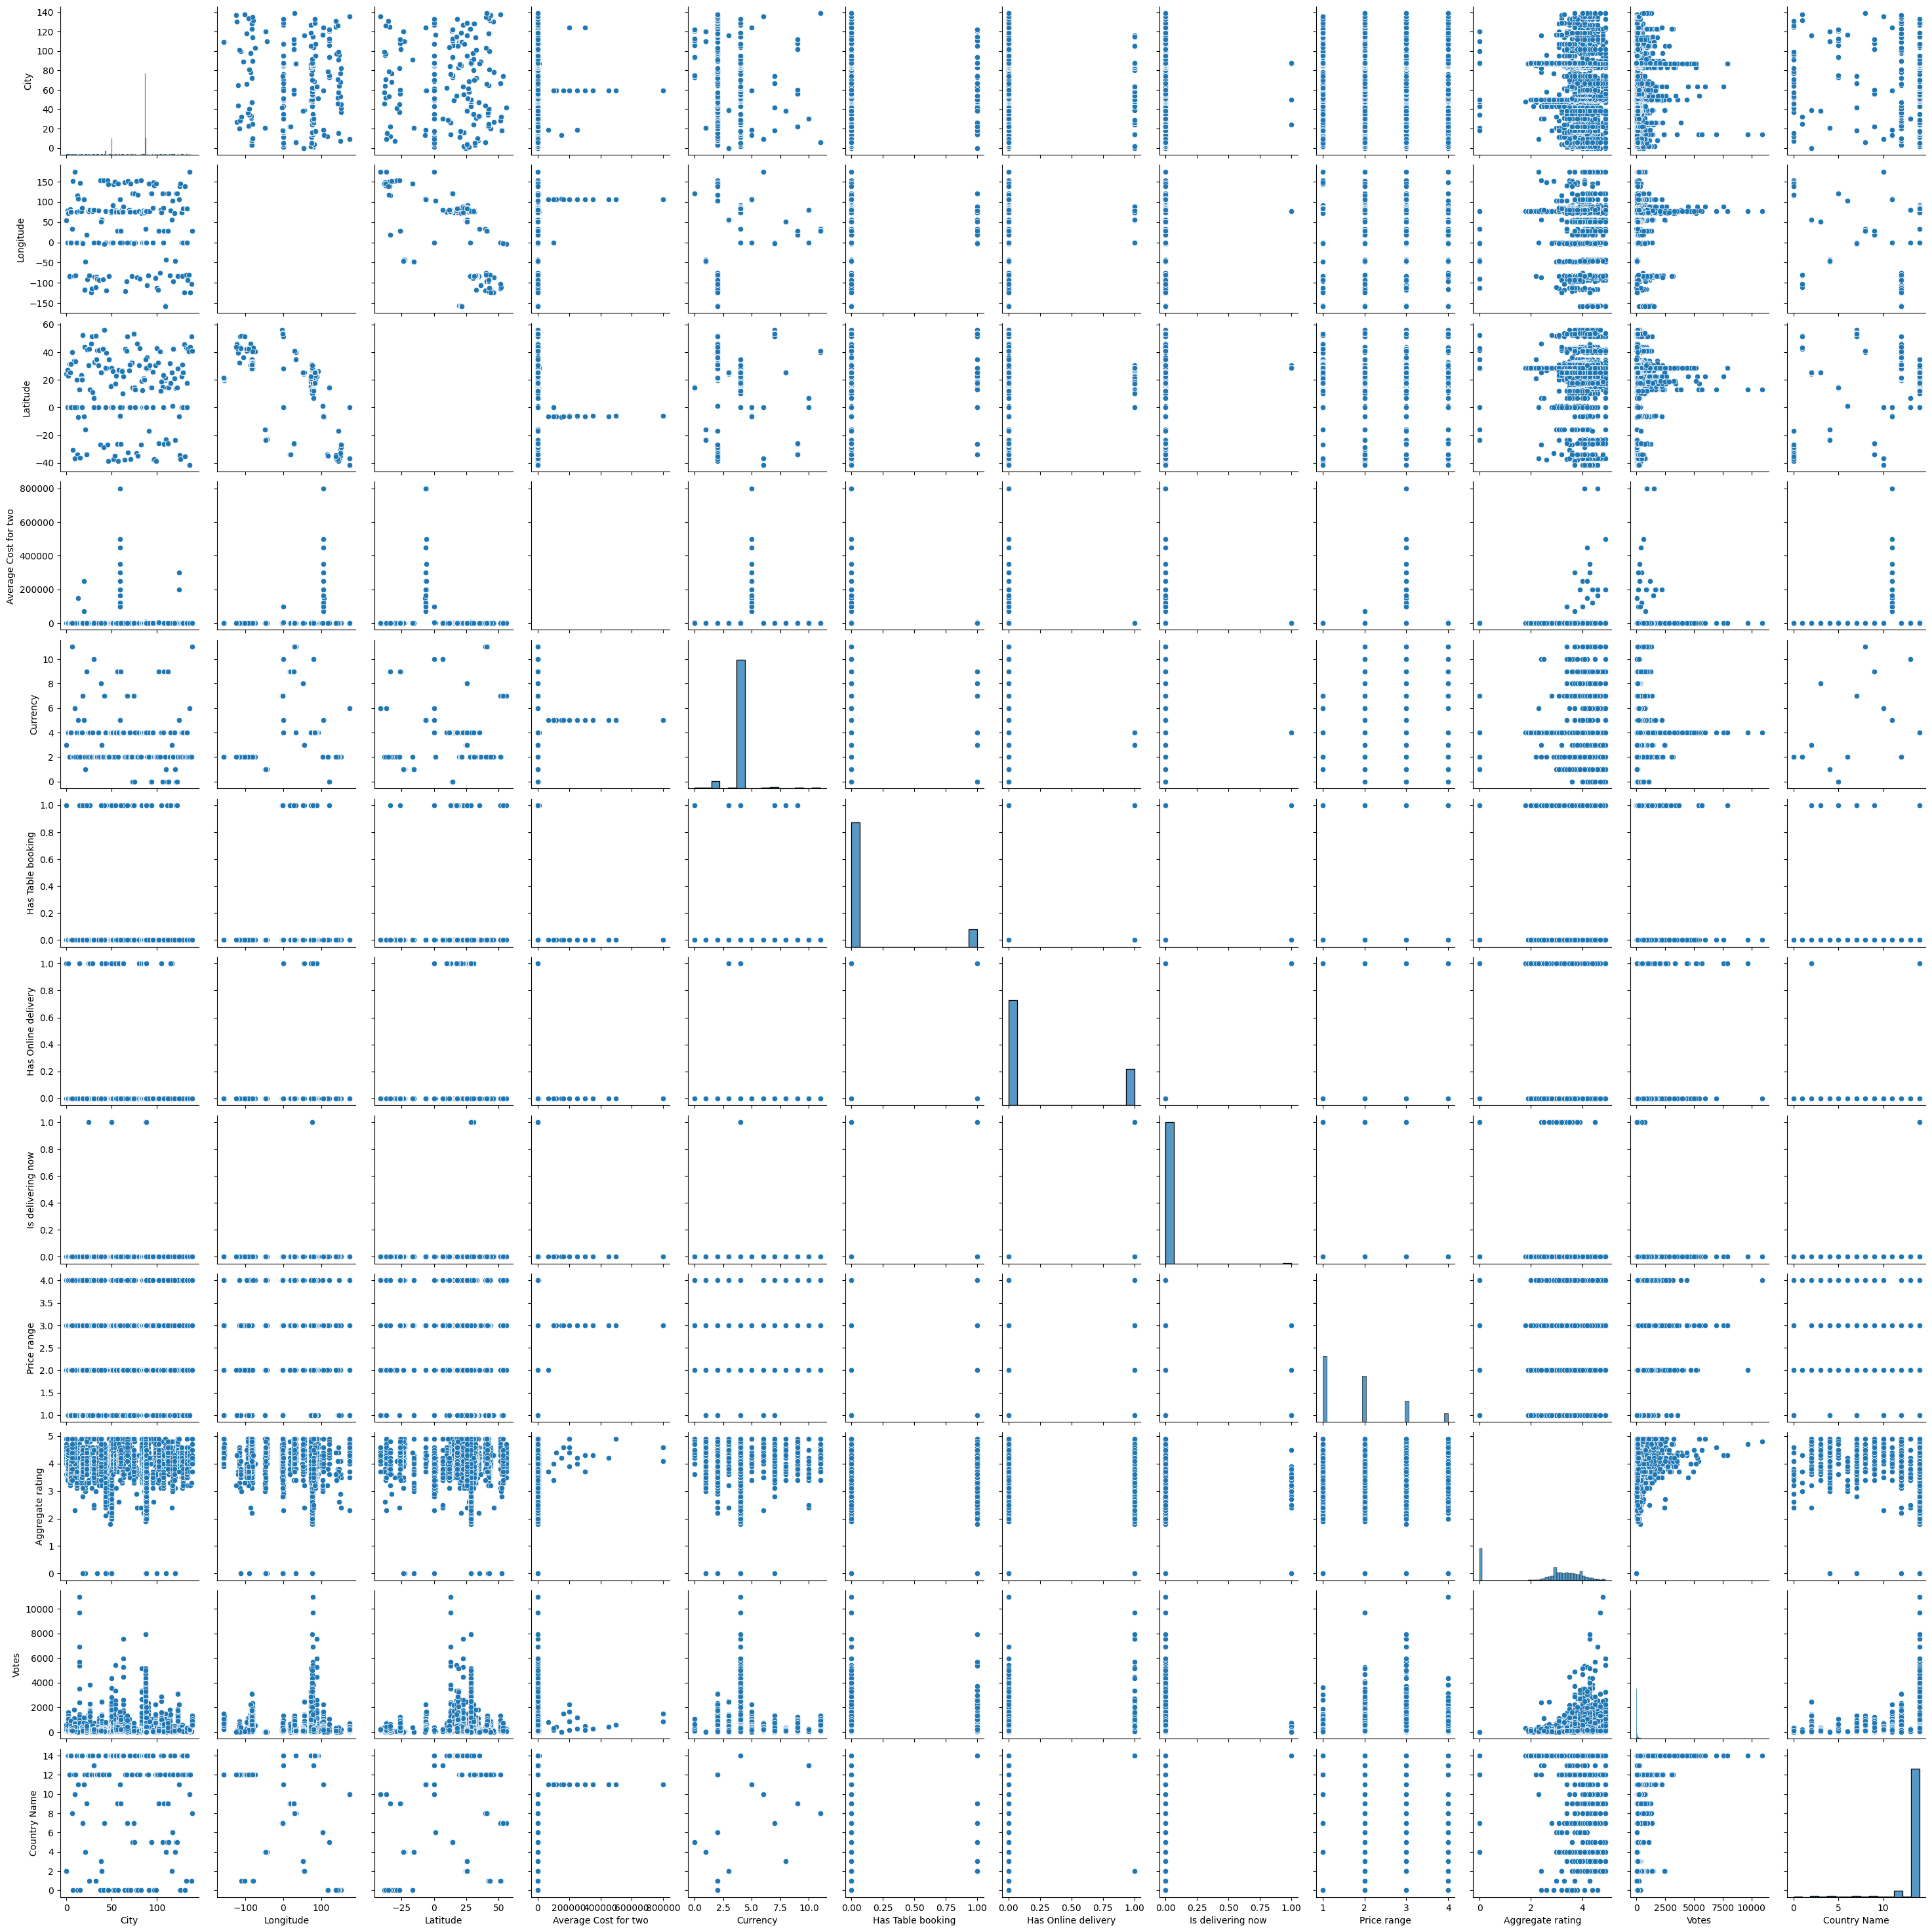

In [25]:
sns.pairplot(data)

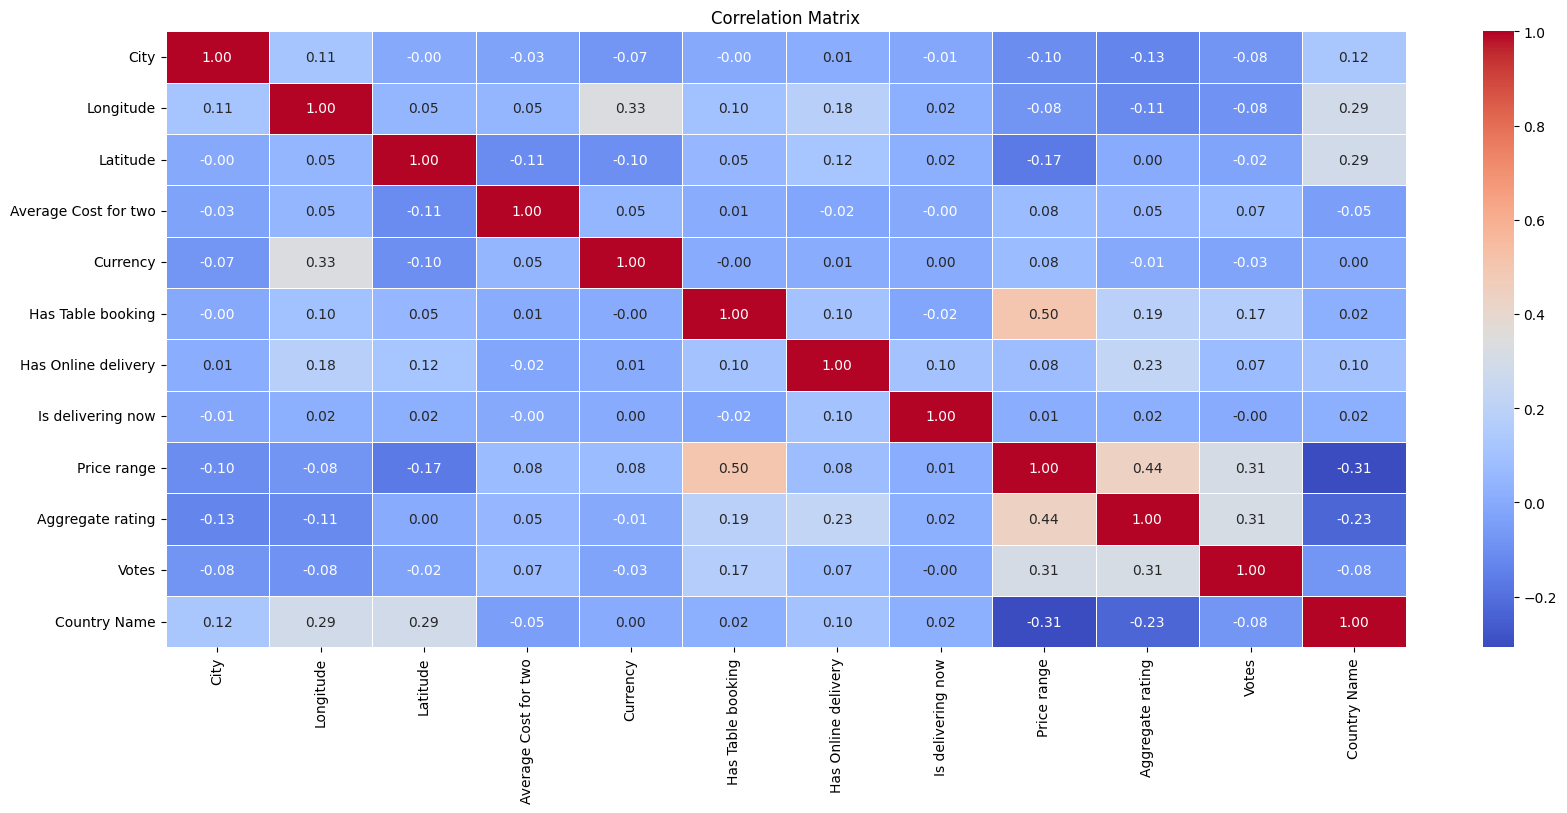

In [26]:
plt.figure(figsize=(20, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [27]:
data.to_csv("../data/processed/data.csv", index=False)